<a href="https://colab.research.google.com/github/tunahfishy/Learnimate/blob/main/musicdiffusor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers[training]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 6.6 MB/s eta 0:00:00


In [24]:
from huggingface_hub import notebook_login

notebook_login()

In [18]:
!sudo apt -qq install git-lfs
!git config --global credential.helper store


git-lfs is already the newest version (2.9.2-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [26]:
!huggingface-cli repo create ddpm-butterflies-128 

git version 2.25.1
git-lfs/2.9.2 (GitHub; linux amd64; go 1.13.5)

You are about to create tinahhong/ddpm-butterflies-128
Proceed? [Y/n] Y

Your repo now lives at:
  https://huggingface.co/tinahhong/ddpm-butterflies-128

You can clone it locally with the command below, and commit/push as usual.

  git clone https://huggingface.co/tinahhong/ddpm-butterflies-128



In [21]:
!git lfs install
!git clone https://huggingface.co/tinahhong/ddpm-butterflies-128

Error: Failed to call git rev-parse --git-dir: exit status 128 
Git LFS initialized.
Cloning into 'ddpm-butterflies-128'...
remote: Repository not found
fatal: repository 'https://huggingface.co/tinahhong/ddpm-butterflies-128/' not found


In [23]:
from dataclasses import dataclass


@dataclass
class TrainingConfig:
    image_size = 128  # the generated image resolution
    train_batch_size = 16
    eval_batch_size = 16  # how many images to sample during evaluation
    num_epochs = 50
    gradient_accumulation_steps = 1
    learning_rate = 1e-4
    lr_warmup_steps = 500
    save_image_epochs = 10
    save_model_epochs = 30
    mixed_precision = "fp16"  # `no` for float32, `fp16` for automatic mixed precision
    output_dir = "ddpm-butterflies-128"  # the model name locally and on the HF Hub

    push_to_hub = True  # whether to upload the saved model to the HF Hub
    hub_private_repo = False
    overwrite_output_dir = True  # overwrite the old model when re-running the notebook
    seed = 0
    text_in_channels = 9
    hidden_size = 128

config = TrainingConfig()

In [4]:
from datasets import load_dataset

# replace with file to own images
config.dataset_name = "huggan/smithsonian_butterflies_subset"
dataset = load_dataset(config.dataset_name, split="train")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/huggan___parquet/huggan--smithsonian_butterflies_subset-7665b1021a37404c/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


In [1]:
## connect to drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
## load in real dataset 
!unzip /content/gdrive/MyDrive/albumcoverimages.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/albumcoverimages/Used To_cover.jpg  
  inflating: /content/data/albumcoverimages/White Room_cover.jpg  
  inflating: /content/data/albumcoverimages/Only Teardrops_cover.jpg  
  inflating: /content/data/albumcoverimages/Flight_cover.jpg  
  inflating: /content/data/albumcoverimages/Electric City_cover.jpg  
  inflating: /content/data/albumcoverimages/Love's a Stranger_cover.jpg  
  inflating: /content/data/albumcoverimages/Hotel California - 2013 Remaster_cover.jpg  
  inflating: /content/data/albumcoverimages/Skanker_cover.jpg  
  inflating: /content/data/albumcoverimages/Brick by Boring Brick_cover.jpg  
  inflating: /content/data/albumcoverimages/Fascination_cover.jpg  
  inflating: /content/data/albumcoverimages/Glory And Gore_cover.jpg  
  inflating: /content/data/albumcoverimages/What to Do_cover.jpg  
  inflating: /content/data/albumcoverimages/Thunder - Bang Gang Remix_cover.jpg  
  inflating: /content

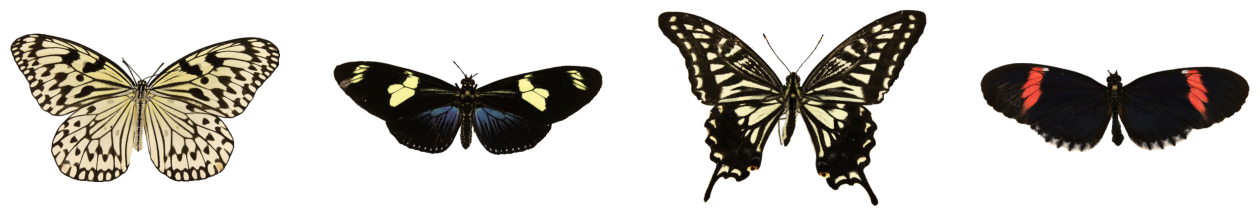

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, image in enumerate(dataset[:4]["image"]):
    axs[i].imshow(image)
    axs[i].set_axis_off()
fig.show()

In [6]:
from torchvision import transforms

preprocess = transforms.Compose(
    [
        transforms.Resize((config.image_size, config.image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)

Add Text to Model (experimental)


In [8]:
# Load the text data and preprocess it
import json
import torch

with open('/content/gdrive/MyDrive/playlist_data.json', "r") as f:
  text_dataset = json.load(f)

text_dataloader = torch.utils.data.DataLoader(text_dataset, batch_size=config.train_batch_size, shuffle=True)

In [42]:
import os
from PIL import Image

# Create a dataset that includes both the preprocessed image and text data
class ImageTextDataset(torch.utils.data.Dataset):
    def __init__(self, image_folder, text_dataset):
        self.text_dataset = text_dataset
        self.image_folder = image_folder
        self.image_filenames = os.listdir(image_folder)


    def __getitem__(self, index):
        image_filename = self.image_filenames[index]
        image_path = os.path.join(self.image_folder, image_filename)
        image = preprocess(Image.open(image_path)).convert('RGB')

        song_data = self.text_dataset[index]
        # Extract the relevant features
        danceability = song_data['danceability']
        energy = song_data['energy']
        loudness = song_data['loudness']
        speechiness = song_data['speechiness']
        acousticness = song_data['acousticness']
        instrumentalness = song_data['instrumentalness']
        liveness = song_data['liveness']
        valence = song_data['valence']
        tempo = song_data['tempo']

        # Create a feature vector by concatenating the features
        text = torch.tensor([danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo])

        return image, text

    def __len__(self):
        return min(len(self.image_filenames), len(self.text_dataset))

image_folder = '/content/data/albumcoverimages'
dataset = ImageTextDataset(image_folder, text_dataset)
train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=config.train_batch_size, shuffle=True)

Normal huggingface notebook

In [17]:
def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}

# dataset = dataset.map(transform)

In [9]:
from diffusers import UNet2DModel

model = UNet2DModel(
    sample_size=config.image_size,  # the target image resolution
    in_channels=3,  # the number of input channels, 3 for RGB images
    out_channels=3,  # the number of output channels
    layers_per_block=2,  # how many ResNet layers to use per UNet block
    block_out_channels=(128, 128, 256, 256, 512, 512),  # the number of output channels for each UNet block
    down_block_types=(
        "DownBlock2D",  # a regular ResNet downsampling block
        "DownBlock2D",
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",  # a ResNet downsampling block with spatial self-attention
        "DownBlock2D",
    ),
    up_block_types=(
        "UpBlock2D",  # a regular ResNet upsampling block
        "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
        "UpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
    ),
)

New Model w Text

In [26]:
from torch import nn
from diffusers import UNet2DModel

class TextEncoder(nn.Module):
    def __init__(self, in_channels, hidden_size):
        super().__init__()
        self.rnn = nn.RNN(in_channels, hidden_size)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.rnn(x)
        x = x.permute(0, 2, 1)
        return x

class AttentionLayer(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.query = nn.Linear(hidden_size, hidden_size)
        self.key = nn.Linear(hidden_size, hidden_size)
        self.value = nn.Linear(hidden_size, hidden_size)

    def forward(self, x, text):
        query = self.query(x)
        key = self.key(text)
        value = self.value(text)
        attention = torch.bmm(query, key.transpose(1, 2))
        attention = F.softmax(attention, dim=1)
        context = torch.bmm(attention, value)
        return context


# model = UNet2DModel(
#     sample_size=config.image_size,  # the target image resolution
#     in_channels=3,  # the number of input channels, 3 for RGB images
#     out_channels=3,  # the number of output channels
#     layers_per_block=2,  # how many ResNet layers to use per UNet block
#     block_out_channels=(128, 128, 256, 256, 512, 512),  # the number of output channels for each UNet block
#     down_block_types=(
#         "DownBlock2D",  # a regular ResNet downsampling block
#         "DownBlock2D",
#         "DownBlock2D",
#         "DownBlock2D",
#         "AttnDownBlock2D",  # a ResNet downsampling block with spatial self-attention
#         "DownBlock2D",
#     ),
#     up_block_types=(
#         "UpBlock2D",  # a regular ResNet upsampling block
#         "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
#         "UpBlock2D",
#         "UpBlock2D",
#         "UpBlock2D",
#         "UpBlock2D",
#     ),
#     text_encoder=TextEncoder(config.text_in_channels, config.hidden_size),
#     attention_layer=AttentionLayer(config.hidden_size),
# )

class TextUNet2DModel(UNet2DModel):
    def __init__(self, config):
        super().__init__(config)
        self.text_encoder = TextEncoder(config.text_in_channels, config.hidden_size)
        self.attention_layer = AttentionLayer(config.hidden_size)

    def forward(self, x, text):
        x = super().forward(x)
        x = self.attention_layer(x, text)
        return x

model = TextUNet2DModel(config)

In [43]:
# sample_image = dataset[0].unsqueeze(0)
print(dataset[0][0])
# print("Input shape:", sample_image.shape)

# print("Output shape:", model(sample_image, timestep=0).sample.shape)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 2>:2                                                                              │
│ in __getitem__:15                                                                                │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'Tensor' object has no attribute 'convert'

In [36]:
import torch
from PIL import Image
from diffusers import DDPMScheduler

noise_scheduler = DDPMScheduler(num_train_timesteps=1000)
noise = torch.randn(sample_image.shape)
timesteps = torch.LongTensor([50])
noisy_image = noise_scheduler.add_noise(sample_image, noise, timesteps)

Image.fromarray(((noisy_image.permute(0, 2, 3, 1) + 1.0) * 127.5).type(torch.uint8).numpy()[0])

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 6>:6                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'sample_image' is not defined

In [44]:
import torch.nn.functional as F

noise_pred = model(noisy_image, timesteps).sample
loss = F.mse_loss(noise_pred, noise)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 3>:3                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'noisy_image' is not defined

In [45]:
from diffusers.optimization import get_cosine_schedule_with_warmup

optimizer = torch.optim.AdamW(model.parameters(), lr=config.learning_rate)
lr_scheduler = get_cosine_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=config.lr_warmup_steps,
    num_training_steps=(len(train_dataloader) * config.num_epochs),
)

In [46]:
from diffusers import DDPMPipeline
import math
import os


def make_grid(images, rows, cols):
    w, h = images[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    for i, image in enumerate(images):
        grid.paste(image, box=(i % cols * w, i // cols * h))
    return grid


def evaluate(config, epoch, pipeline):
    # Sample some images from random noise (this is the backward diffusion process).
    # The default pipeline output type is `List[PIL.Image]`
    images = pipeline(
        batch_size=config.eval_batch_size,
        generator=torch.manual_seed(config.seed),
    ).images

    # Make a grid out of the images
    image_grid = make_grid(images, rows=4, cols=4)

    # Save the images
    test_dir = os.path.join(config.output_dir, "samples")
    os.makedirs(test_dir, exist_ok=True)
    image_grid.save(f"{test_dir}/{epoch:04d}.png")

In [47]:
from accelerate import Accelerator
from huggingface_hub import HfFolder, Repository, whoami
from tqdm.auto import tqdm
from pathlib import Path
import os


def get_full_repo_name(model_id: str, organization: str = None, token: str = None):
    if token is None:
        token = HfFolder.get_token()
    if organization is None:
        username = whoami(token)["name"]
        return f"{username}/{model_id}"
    else:
        return f"{organization}/{model_id}"


def train_loop(config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler):
    # Initialize accelerator and tensorboard logging
    accelerator = Accelerator(
        mixed_precision=config.mixed_precision,
        gradient_accumulation_steps=config.gradient_accumulation_steps,
        log_with="tensorboard",
        logging_dir=os.path.join(config.output_dir, "logs"),
    )
    if accelerator.is_main_process:
        if config.push_to_hub:
            repo_name = get_full_repo_name(Path(config.output_dir).name)
            repo = Repository(config.output_dir, clone_from=repo_name)
        elif config.output_dir is not None:
            os.makedirs(config.output_dir, exist_ok=True)
        accelerator.init_trackers("train_example")

    # Prepare everything
    # There is no specific order to remember, you just need to unpack the
    # objects in the same order you gave them to the prepare method.
    model, optimizer, train_dataloader, lr_scheduler = accelerator.prepare(
        model, optimizer, train_dataloader, lr_scheduler
    )

    global_step = 0

    # Now you train the model
    for epoch in range(config.num_epochs):
        progress_bar = tqdm(total=len(train_dataloader), disable=not accelerator.is_local_main_process)
        progress_bar.set_description(f"Epoch {epoch}")

        for step, batch in enumerate(train_dataloader):
            clean_images = batch["images"]
            # Sample noise to add to the images
            noise = torch.randn(clean_images.shape).to(clean_images.device)
            bs = clean_images.shape[0]

            # Sample a random timestep for each image
            timesteps = torch.randint(
                0, noise_scheduler.config.num_train_timesteps, (bs,), device=clean_images.device
            ).long()

            # Add noise to the clean images according to the noise magnitude at each timestep
            # (this is the forward diffusion process)
            noisy_images = noise_scheduler.add_noise(clean_images, noise, timesteps)

            with accelerator.accumulate(model):
                # Predict the noise residual
                noise_pred = model(noisy_images, timesteps, return_dict=False)[0]
                loss = F.mse_loss(noise_pred, noise)
                accelerator.backward(loss)

                accelerator.clip_grad_norm_(model.parameters(), 1.0)
                optimizer.step()
                lr_scheduler.step()
                optimizer.zero_grad()

            progress_bar.update(1)
            logs = {"loss": loss.detach().item(), "lr": lr_scheduler.get_last_lr()[0], "step": global_step}
            progress_bar.set_postfix(**logs)
            accelerator.log(logs, step=global_step)
            global_step += 1

        # After each epoch you optionally sample some demo images with evaluate() and save the model
        if accelerator.is_main_process:
            pipeline = DDPMPipeline(unet=accelerator.unwrap_model(model), scheduler=noise_scheduler)

            if (epoch + 1) % config.save_image_epochs == 0 or epoch == config.num_epochs - 1:
                evaluate(config, epoch, pipeline)

            if (epoch + 1) % config.save_model_epochs == 0 or epoch == config.num_epochs - 1:
                if config.push_to_hub:
                    repo.push_to_hub(commit_message=f"Epoch {epoch}", blocking=True)
                else:
                    pipeline.save_pretrained(config.output_dir)

In [ ]:
from accelerate import notebook_launcher

args = (config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler)

notebook_launcher(train_loop, args, num_processes=1)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:258: FutureWarning: `logging_dir` is deprecated and will be removed in version 0.18.0 of 🤗 Accelerate. Use `project_dir` instead.
  warnings.warn(
Cloning https://huggingface.co/tinahhong/ddpm-butterflies-128 into local empty directory.


Launching training on one CPU.


  0%|          | 0/63 [00:00<?, ?it/s]

In [ ]:
import glob

sample_images = sorted(glob.glob(f"{config.output_dir}/samples/*.png"))
Image.open(sample_images[-1])